# Remove nodes

In [55]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
# Importamos el layout que viene de Gephi
g = nx.read_graphml("../../../Data/Daily_graphs/Gephi/2021-04-28_gephi.graphml")

In [3]:
# Extract layout
# Extract layout information
layout_data = {}
for node_id, data in g.nodes(data=True):
    layout_data[node_id] = {
        'x': data.get('x', {}),
        'y': data.get('y', {}),
    }

# Get the positions from the layout data
pos = {node: (data['x'], data['y']) for node, data in layout_data.items()}

In [7]:
g.number_of_nodes()

37112

In [6]:
len(pos.keys())

37112

In [15]:
# Vamos a calcular el centroide de toda la red. Vamos a utilizar la mediana
x = [pos[i][0] for i in pos.keys()]
y = [pos[i][1] for i in pos.keys()]

centroide_x = np.median(x)
centroide_y = np.median(y)

Text(0.5, 1.0, 'Distancia de los nodos al centroide')

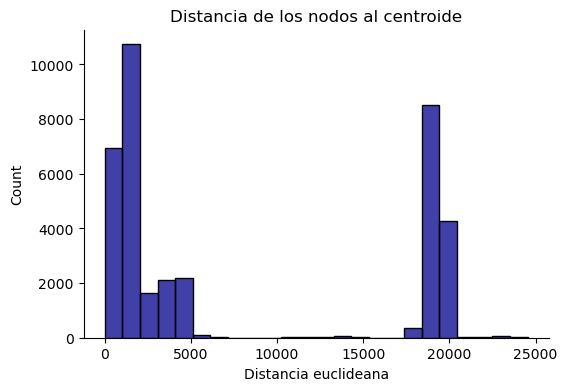

In [143]:
# Ahora vamos a construir círculos centrados en el centroide con diferentes radios. Con esto en mente 
# queremos definir cual es la proporción de nodos dentro y fuera del circulo  

# Para construir el circulo ideal vamos a revisar las distancias euclideana (eficientemente) de todos los puntos al centroide
resta = np.array(list(zip(x, y))) - np.array((centroide_x, centroide_y))
resta_cuadrado = resta**2
suma_cuadrados = np.sum(resta_cuadrado, axis = 1)
distancia_euclideana = np.sqrt(suma_cuadrados)

# Graficamos histograma de distancias
fig, ax = plt.subplots(figsize = (6, 4))
sns.despine()
sns.histplot(x = distancia_euclideana, color = "darkblue", ax = ax)
plt.xlabel("Distancia euclideana")
plt.title("Distancia de los nodos al centroide")
# La grafica nos muestra dos picos! Por ende si creamos un circulo con radio 10000 (?) podriamos capturar lo más importante!

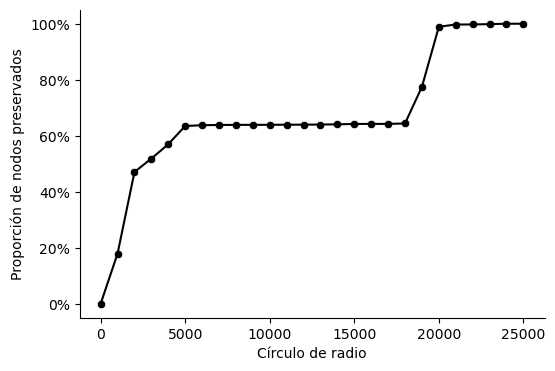

In [74]:
# Creemos una grilla de radios para ver cuantos nodos tenemos en la medida que el circulo crece o decrece
grilla_radios = list(range(0, 25001, 1000)) 
proporcion_nodos = [np.mean(distancia_euclideana < r) for r in grilla_radios]

fig, ax = plt.subplots(figsize = (6, 4))
sns.despine()
sns.lineplot(x = grilla_radios, y = proporcion_nodos, color = "black", ax = ax)
sns.scatterplot(x = grilla_radios, y = proporcion_nodos, color = "black", ax = ax)
plt.xlabel("Círculo de radio")
plt.ylabel("Proporción de nodos preservados")
ax.yaxis.set_major_formatter("{x:0.0%}")

In [75]:
# Hagamos gráficas

# Create a list of node colors based on 'Political Affiliation' attribute
pa = [data['Political Affiliation'] for node_id, data in g.nodes(data=True)]
color_map = {
    'Centro': "red", 
    'Derecha': "blue", 
    'Izquierda': "green", 
    'No Retweets': 'purple', 
}

node_colors = [color_map.get(i, 'gray') for i in pa]

# Create a list of node sizes based on 'size' attribute
node_sizes = [data['size'] for node_id, data in g.nodes(data=True)]

In [100]:
filtro_r_10 = distancia_euclideana < 10000
g_r_10 = g.copy()

# Asegurarse de que la lista booleana tiene la misma longitud que el número de nodos en la red
if len(filtro_r_10) == g_r_10.number_of_nodes():
    # Identificar los nodos a eliminar
    nodos_a_eliminar = [nodo for nodo, mantener in zip(g_r_10.nodes, filtro_r_10) if not mantener]
    porcentaje_eliminacion = len(nodos_a_eliminar)/g_r_10.number_of_nodes()
    print("Vamos a eliminar el {:0.1%} de los nodos".format(porcentaje_eliminacion))
    # Eliminar los nodos
    g_r_10.remove_nodes_from(nodos_a_eliminar)
else:
    print("El filtro y el número de nodos tienen diferente tamaño!")

# Escogemos las posiciones adecuadas, colores y tamaños
pos_r_10 = {key: pos[key] for key in g_r_10.nodes}
node_colors_r_10 = np.array(node_colors)[filtro_r_10]
node_sizes_r_10 = np.array(node_sizes)[filtro_r_10]*5

Vamos a eliminar el 36.1% de los nodos


In [144]:
g.number_of_nodes()

37112

In [145]:
g_r_10.number_of_nodes()

23715

In [139]:
# Crear elementos de leyenda
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=key,
                              markerfacecolor=color, markersize=10)
                   for key, color in color_map.items()]

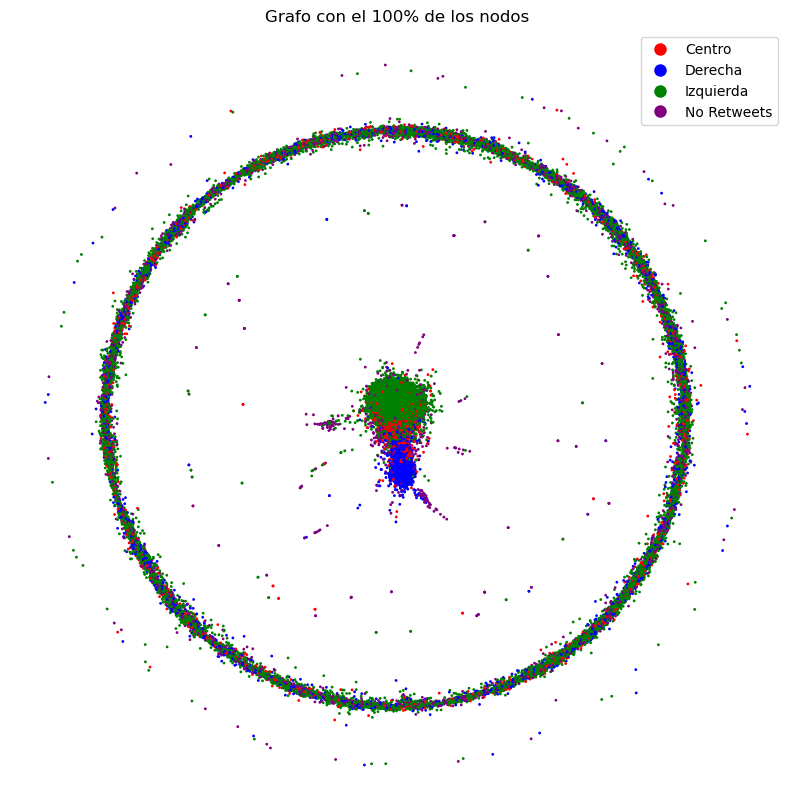

In [142]:
plt.figure(figsize = (10, 10)) 

# Draw nodes with specified size and color
nx.draw_networkx_nodes(g, pos, node_color = node_colors, node_size = node_sizes);

# Draw edges
# nx.draw_networkx_edges(g, pos, alpha = 0.5, arrows = False)

# Añadir la leyenda al gráfico
plt.legend(handles = legend_elements, loc = 'upper right')

# Añadir título
plt.title("Grafo con el 100% de los nodos")

plt.axis('off');

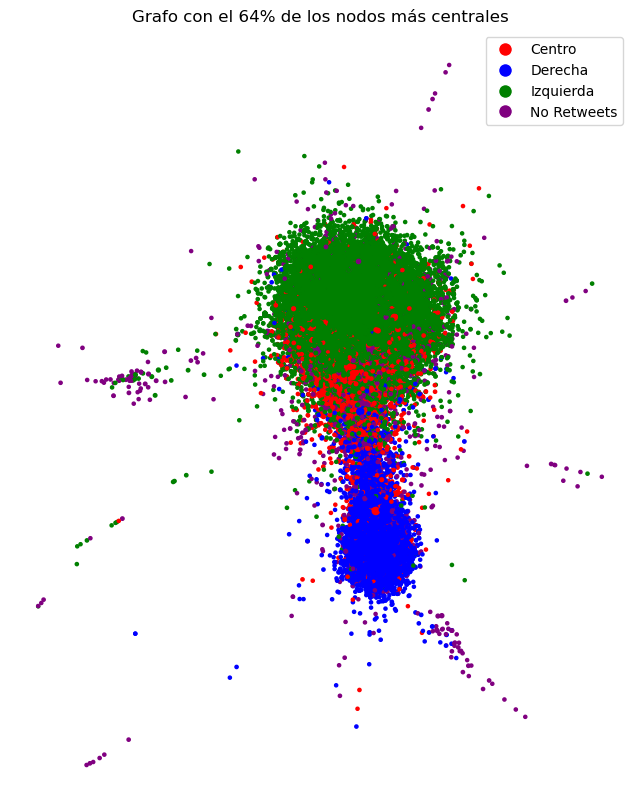

In [141]:
plt.figure(figsize = (8, 10)) 

# Draw nodes with specified size and color
nx.draw_networkx_nodes(g_r_10, pos_r_10, node_color = node_colors_r_10, node_size = node_sizes_r_10);

# Draw edges
# nx.draw_networkx_edges(g, pos, alpha = 0.5, arrows = False)

# Añadir la leyenda al gráfico
plt.legend(handles = legend_elements, loc = 'upper right')

# Añadir título
plt.title("Grafo con el 64% de los nodos más centrales")

plt.axis('off');

In [149]:
# Mismo análisis sin No Retweets

filtro_no_retweets = [i != "No Retweets" for i in pa]

g_no_rt = g.copy()

# Identificar los nodos a eliminar
nodos_a_eliminar = [nodo for nodo, mantener in zip(g_no_rt.nodes, filtro_no_retweets) if not mantener]
porcentaje_eliminacion = len(nodos_a_eliminar)/g_no_rt.number_of_nodes()
print("Vamos a eliminar el {:0.1%} de los nodos".format(porcentaje_eliminacion))
# Eliminar los nodos
g_no_rt.remove_nodes_from(nodos_a_eliminar)


# Escogemos las posiciones adecuadas, colores y tamaños
pos_no_rt = {key: pos[key] for key in g_no_rt.nodes}
node_colors_no_rt = np.array(node_colors)[filtro_no_retweets]
node_sizes_no_rt = np.array(node_sizes)[filtro_no_retweets]*5


Vamos a eliminar el 9.8% de los nodos


In [152]:
# Vamos a calcular el centroide de toda la red. Vamos a utilizar la mediana
x_no_rt = [pos_no_rt[i][0] for i in pos_no_rt.keys()]
y_no_rt = [pos_no_rt[i][1] for i in pos_no_rt.keys()]

centroide_x_no_rt = np.median(x_no_rt)
centroide_y_no_rt = np.median(y_no_rt)

Text(0.5, 1.0, 'Distancia de los nodos al centroide')

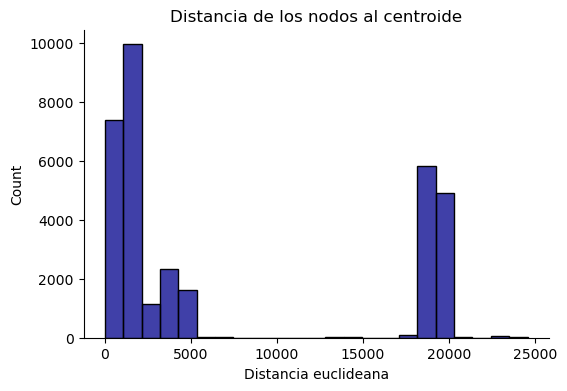

In [153]:
# Ahora vamos a construir círculos centrados en el centroide con diferentes radios. Con esto en mente 
# queremos definir cual es la proporción de nodos dentro y fuera del circulo  

# Para construir el circulo ideal vamos a revisar las distancias euclideana (eficientemente) de todos los puntos al centroide
resta = np.array(list(zip(x_no_rt, y_no_rt))) - np.array((centroide_x_no_rt, centroide_y_no_rt))
resta_cuadrado = resta**2
suma_cuadrados = np.sum(resta_cuadrado, axis = 1)
distancia_euclideana = np.sqrt(suma_cuadrados)

# Graficamos histograma de distancias
fig, ax = plt.subplots(figsize = (6, 4))
sns.despine()
sns.histplot(x = distancia_euclideana, color = "darkblue", ax = ax)
plt.xlabel("Distancia euclideana")
plt.title("Distancia de los nodos al centroide")
# La grafica nos muestra dos picos! Por ende si creamos un circulo con radio 10000 (?) podriamos capturar lo más importante!

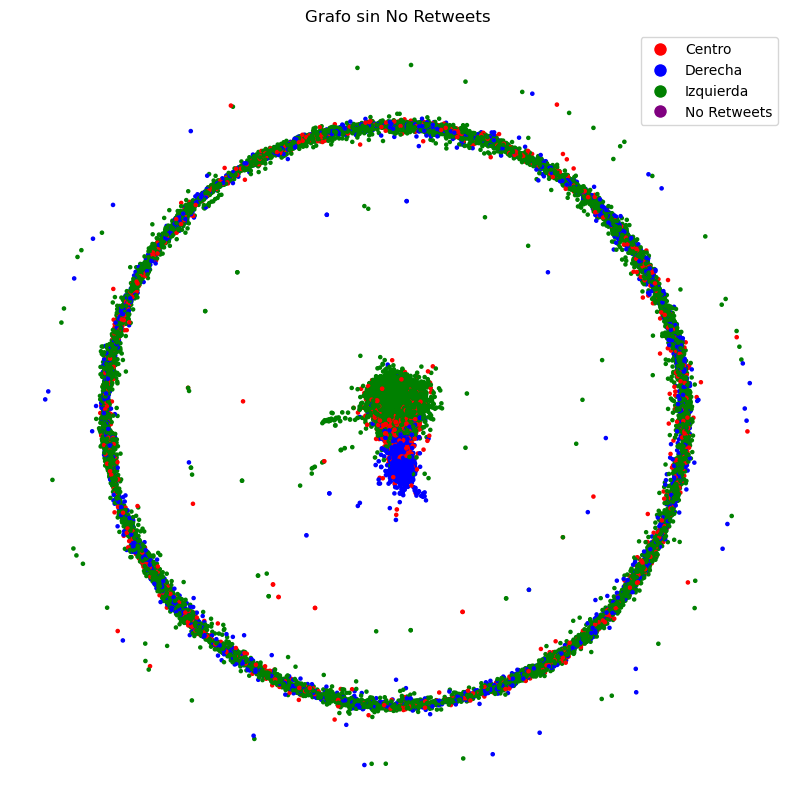

In [155]:
plt.figure(figsize = (10, 10)) 

# Draw nodes with specified size and color
nx.draw_networkx_nodes(g_no_rt, pos_no_rt, node_color = node_colors_no_rt, node_size = node_sizes_no_rt);

# Draw edges
# nx.draw_networkx_edges(g, pos, alpha = 0.5, arrows = False)

# Añadir la leyenda al gráfico
plt.legend(handles = legend_elements, loc = 'upper right')

# Añadir título
plt.title("Grafo sin No Retweets")

plt.axis('off');

In [159]:
filtro_r_10 = distancia_euclideana < 10000
g_no_rt2 = g_no_rt.copy()

# Asegurarse de que la lista booleana tiene la misma longitud que el número de nodos en la red
if len(filtro_r_10) == g_no_rt2.number_of_nodes():
    # Identificar los nodos a eliminar
    nodos_a_eliminar = [nodo for nodo, mantener in zip(g_no_rt2.nodes, filtro_r_10) if not mantener]
    porcentaje_eliminacion = len(nodos_a_eliminar)/g_no_rt2.number_of_nodes()
    print("Vamos a eliminar el {:0.1%} de los nodos".format(porcentaje_eliminacion))
    # Eliminar los nodos
    g_no_rt2.remove_nodes_from(nodos_a_eliminar)
else:
    print("El filtro y el número de nodos tienen diferente tamaño!")

# Escogemos las posiciones adecuadas, colores y tamaños
pos_no_rt2 = {key: pos[key] for key in g_no_rt2.nodes}
node_colors_no_rt2 = np.array(node_colors_no_rt)[filtro_r_10]
node_sizes_no_rt2 = np.array(node_sizes_no_rt)[filtro_r_10]*5

Vamos a eliminar el 32.8% de los nodos


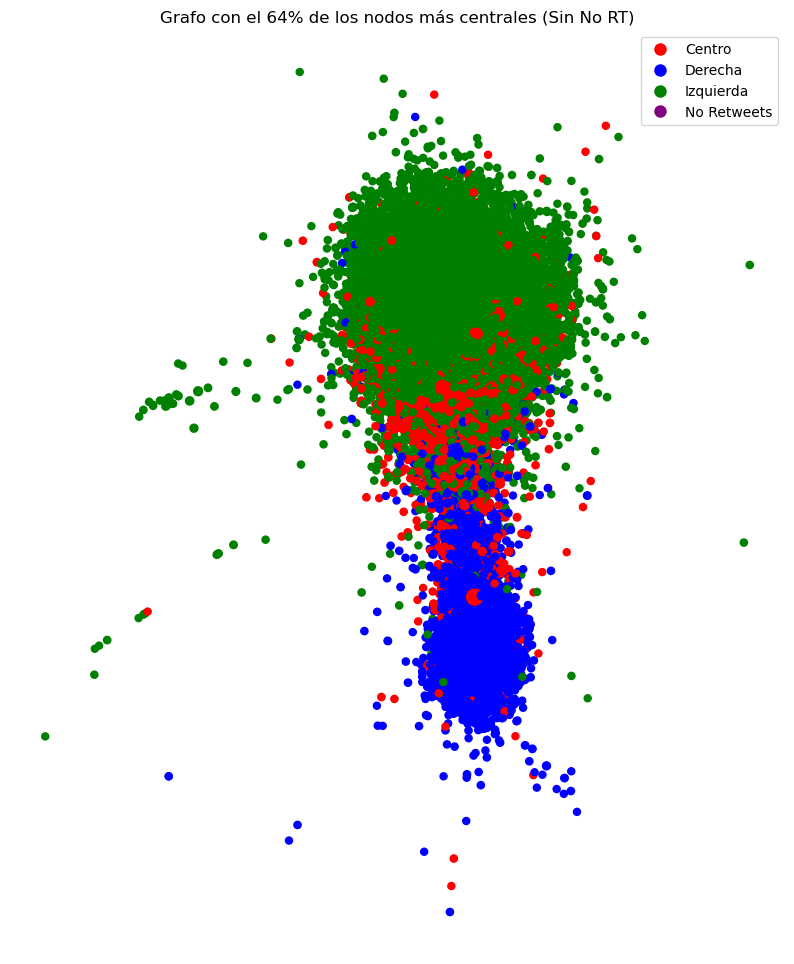

In [162]:
plt.figure(figsize = (10, 12)) 

# Draw nodes with specified size and color
nx.draw_networkx_nodes(g_no_rt2, pos_no_rt2, node_color = node_colors_no_rt2, node_size = node_sizes_no_rt2);

# Draw edges
# nx.draw_networkx_edges(g, pos, alpha = 0.5, arrows = False)

# Añadir la leyenda al gráfico
plt.legend(handles = legend_elements, loc = 'upper right')

# Añadir título
plt.title("Grafo con el 64% de los nodos más centrales (Sin No RT)")

plt.axis('off');

In [163]:
g_no_rt2.number_of_nodes()

22497